In [95]:
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext ipython_unittest

The ipython_unittest extension is already loaded. To reload it, use:
  %reload_ext ipython_unittest


In [2]:
%ls

Untitled.ipynb
drive-download-20170512T141423Z-001/
drive-download-20170512T141423Z-001.zip
mixed/
results-20170419-short-esp-type-1.xlsx*
results-20170420-long-esp-type-2-18.xlsx*
results-20170420-long-esp-type-2.xlsx*
results-20170421-capucio-type2-24.xlsx
results-20170501-latte-type2-10.xlsx
~$results-20170419-short-esp-type-1.xlsx


In [41]:
def time_diff_per_df(df):
    """
    calculates time differences for adjacent rows per file.
    """
    return [(b - a).seconds for a, b in zip(df['date'].iloc[0:], df['date'].iloc[1:])]

In [93]:
res = []
for fname in os.listdir('./drive-download-20170512T141423Z-001/'):
    if not fname.endswith('.xlsx'):
        continue
    print fname
    df = pd.read_excel(os.path.join('./drive-download-20170512T141423Z-001',
                         fname))
    try:
        res.append(time_diff_per_df(df))
    except:
        print 'some problem'
        pass                       
 
    

results-20170417-סדרה משולבת של כל סוגי הקפה סוג פולים 1.xlsx
results-20170419-סדרה של 24 אספרסו קצר סוג 1.xlsx
results-20170420-סדרה של אספרסו ארוך 17 מופעים סוג פולים 2.xlsx
some problem
results-20170420-סדרה של אספרסו ארוך סוג 2 עם 18 מופעים.xlsx
some problem
results-20170421-סדרה של 24 קפוצינו ו 20 ניקוי צינורית חלב סוג 2.xlsx
results-20170426-סדרה של אספרסו קצר וארוך משני סוגי פולים.xlsx
results-20170501- סדרה של אספרסו קצר וארוך בהפעלה כפולה 10 מחזורים וגם לטה 15 מחזורים_שני סוגי פולים.xlsx


/usr/local/lib/python2.7/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


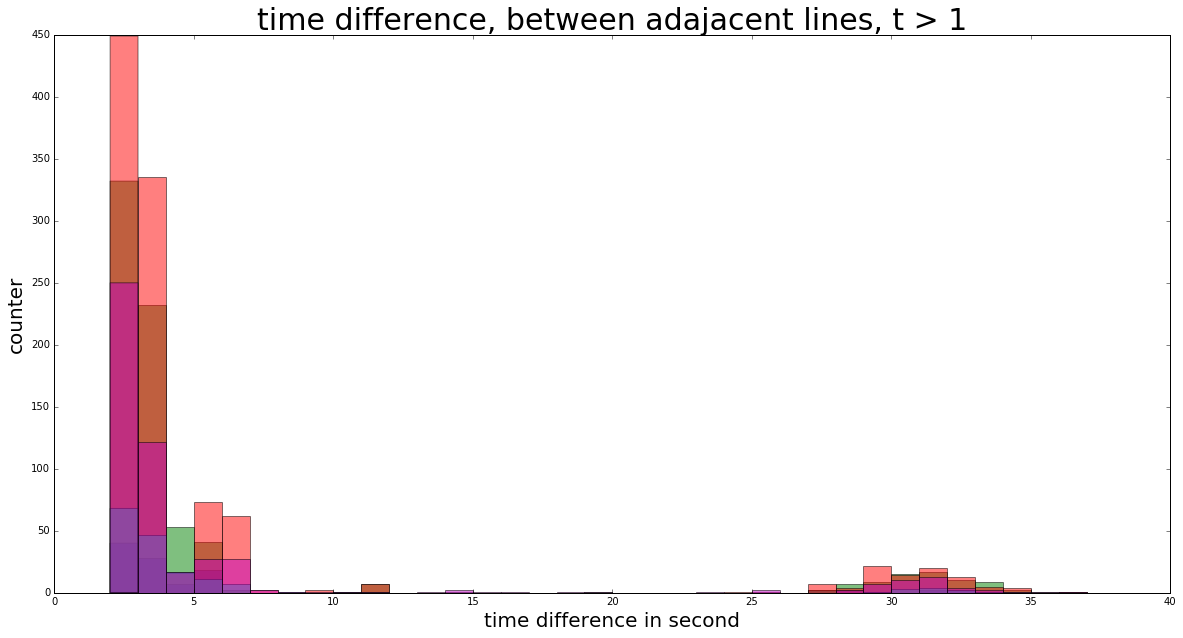

In [114]:
plt.rcParams['figure.figsize'] = (20, 10)
for r in res:
    bins=[2,3,4] + range(5,40)
    plt.hist(r, bins=bins, alpha = .5)
plt.xlabel('time difference in second', fontsize=20)
plt.ylabel('counter', fontsize=20)
plt.title('time difference, between adajacent lines, t > 1', fontsize=30)
plt.legend()

In [85]:
%%unittest_testcase

def test_time_diff_per_df(self):
    a = pd.DataFrame([{'date': '0'}, {'date': '1'}, {'date': '2'}])
    a['date'] = pd.to_datetime(a['date'], format='%S')
    b = pd.DataFrame([{'date': '0'}, {'date': '20'}, {'date': '21'}])
    b['date'] = pd.to_datetime(b['date'], format='%S')
    self.assertListEqual(time_diff_per_df(a), [1, 1])
    self.assertListEqual(time_diff_per_df(b), [20, 1])

<IPython.core.display.Javascript object>

.
----------------------------------------------------------------------
Ran 1 test in 0.003s

OK


<IPython.core.display.Javascript object>

<unittest.runner.TextTestResult run=1 errors=0 failures=0>